In [1]:
#Emergent Non-Markovian Gain in Open Quantum Systems
#https://arxiv.org/pdf/2503.21739
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

TypeError: text() missing 1 required positional argument: 's'

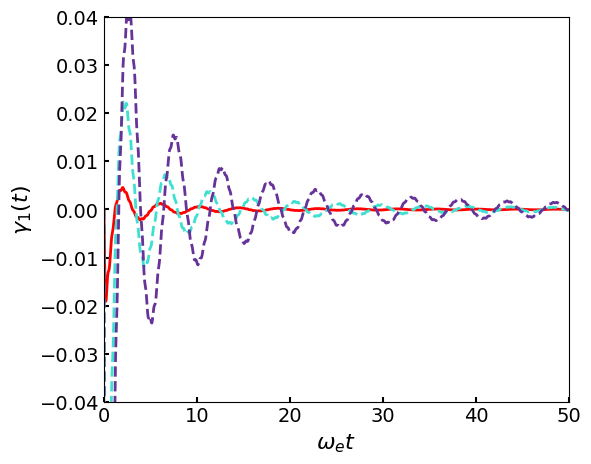

In [2]:
omega_e = 1.0
Delta = 0.5 * omega_e
gammas = [0.1, 0.5, 0.9] 
colors = ['red', 'turquoise', 'rebeccapurple']
linestyles = ['-', '--', '--']
linewidths = [2.0, 2.0, 2.0]
def spectral_density(omega, Gamma, w_e):
    if omega <= w_e: return 0.0
    return (Gamma / np.pi) * np.sqrt(omega - w_e) / omega
N_modes = 2000
w_cutoff = 15 * omega_e
omega_k = np.linspace(omega_e + 1e-4, w_cutoff, N_modes)
d_omega = omega_k[1] - omega_k[0]
def system_dynamics(t, y, g_k_list, omega_k_list, Delta):
    u = y[0]
    v = y[1:]
    du_dt = -1j * Delta * u + np.sum(g_k_list * v)
    dv_dt = 1j * omega_k_list * v + g_k_list * u
    return np.concatenate(([du_dt], dv_dt))
plt.figure(figsize=(6, 5)) 
for i, Gamma_val in enumerate(gammas):
    J_vals = np.array([spectral_density(w, Gamma_val * omega_e, omega_e) for w in omega_k])
    g_k = np.sqrt(J_vals * d_omega)
    y0 = np.zeros(N_modes + 1, dtype=complex)
    y0[0] = 1.0 + 0j
    t_eval = np.linspace(0, 50, 1000)    
    sol = solve_ivp(system_dynamics, (0, 50), y0, t_eval=t_eval, 
                    args=(g_k, omega_k, Delta), rtol=1e-6, atol=1e-8)
    u = sol.y[0]      
    v = sol.y[1:]     
    interaction = np.dot(g_k, v) 
    du_dt = -1j * Delta * u + interaction
    gamma1 = -np.real(du_dt / (u + 1e-15))
    plt.plot(sol.t, gamma1, 
             color=colors[i], 
             linestyle=linestyles[i], 
             linewidth=linewidths[i],
             label=rf'$\Gamma={Gamma_val}\omega_e$')
plt.xlim(0, 50)
plt.ylim(-0.04, 0.04)
plt.xlabel(r'$\omega_e t$', fontsize=16)
plt.ylabel(r'$\gamma_1(t)$', fontsize=16)
plt.tick_params(labelsize=14, direction='in', width=1.5)
plt.text(0.85, 0.85, transform=plt.gca().transAxes, 
         fontsize=16, color='white',
         bbox=dict(facecolor='black', edgecolor='none', alpha=0.9))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.tight_layout()
plt.show()